In [1]:
## standart libraries
import os,sys
import numpy as np

# xarray
import xarray as xr
# plot
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap

In [2]:
# read grid files
diri="/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/"
nav_lon = xr.open_dataset(diri+'mesh_hgr.nc')['nav_lon']
nav_lat = xr.open_dataset(diri+'mesh_hgr.nc')['nav_lat']

Chukchi_mask = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/rivers_mask/chukchi_mask.nc').polymask.squeeze()
eastsiberian_mask = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/rivers_mask/eastSiberian_mask.nc').polymask.squeeze()
laptev_mask = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/rivers_mask/laptev_mask.nc').polymask.squeeze()
kara_part1_mask = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/rivers_mask/kara_part1_mask.nc').polymask.squeeze()
kara_part2_mask = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/rivers_mask/kara_part2_mask.nc').polymask.squeeze()
kara_mask = kara_part1_mask + kara_part2_mask
barents_mask = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/rivers_mask/barents_mask.nc').polymask.squeeze()
norwegian_mask = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/rivers_mask/norwegian_mask.nc').polymask.squeeze()
BaffinHudson_mask = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/rivers_mask/BaffinHudson_mask.nc').polymask.squeeze()
caa_part1 = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/rivers_mask/caa_part1.nc').polymask.squeeze()
caa_part2 = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/rivers_mask/caapart2_mask.nc').polymask.squeeze()
caa_mask = caa_part1 +caa_part2
beaufort_mask = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/rivers_mask/beaufort_mask.nc').polymask.squeeze()

tot_mask = Chukchi_mask + eastsiberian_mask + laptev_mask + kara_mask + barents_mask + norwegian_mask + BaffinHudson_mask + caa_mask + beaufort_mask

In [3]:
#vue polaire
loncentr=200 # before it was zero
latcentr=90

# sath=2085831
sath=2086000

In [4]:
# dictionary of the colorblind friendly colors used
CB_colors = {
    'blue':    '#377eb8', 
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'red':     '#e41a1c',
    'yellow':  '#dede00'
} 

In [5]:
greenland_coast = [(-51.21015624999998, 68.419921875), (-51.29345703125, 68.416357421875), (-51.45610351562499, 68.393505859375), (-51.47802734375, 68.383984375), (-51.47504882812498, 68.365380859375), (-51.632421875000006, 68.273046875), (-51.80400390624999, 68.251806640625), (-52.19853515624999, 68.22080078125), (-52.37851562499999, 68.218603515625), (-52.698388671874994, 68.2615234375), (-52.74677734375, 68.278369140625), (-52.780029296875, 68.30986328125), (-53.172509765624994, 68.302734375), (-53.28984374999999, 68.29326171875), (-53.38315429687499, 68.29736328125), (-53.33740234375, 68.3521484375), (-53.213281249999994, 68.41298828125), (-53.039453124999994, 68.610888671875), (-52.89384765624999, 68.6615234375), (-52.60458984374999, 68.708740234375), (-52.30278320312499, 68.701123046875), (-51.780664062499994, 68.548193359375), (-51.623144531250006, 68.534814453125), (-51.47871093749998, 68.54716796875), (-51.13330078125, 68.5984375), (-51.069921875000006, 68.619189453125), (-50.945703124999994, 68.682666015625), (-50.800634765625006, 68.791259765625), (-50.807714843750006, 68.8169921875), (-51.03022460937498, 68.756298828125), (-51.14887695312498, 68.73994140625), (-51.249414062499994, 68.73994140625), (-51.15605468749999, 68.938427734375), (-51.119726562500006, 69.09052734375), (-51.084863281249994, 69.128271484375), (-50.79228515624999, 69.116845703125), (-50.392675781250006, 69.13740234375), (-50.29736328125, 69.17060546875), (-50.29887695312499, 69.1853515625), (-50.459374999999994, 69.205517578125), (-50.53662109375, 69.2478515625), (-50.671044921874994, 69.23447265625), (-50.85107421875, 69.20625), (-51.07695312499999, 69.20947265625), (-51.05781249999998, 69.2748046875), (-50.892236328124994, 69.411767578125), (-50.87519531249998, 69.47421875), (-50.81059570312499, 69.5990234375), (-50.804101562499994, 69.663037109375), (-50.72026367187499, 69.725341796875), (-50.459082031250006, 69.7697265625), (-50.349462890625006, 69.796240234375), (-50.34345703124998, 69.825244140625), (-50.5, 69.935791015625), (-50.46025390624999, 69.96630859375), (-50.337500000000006, 69.994140625), (-50.29169921874998, 70.014453125), (-50.32294921874998, 70.0271484375), (-50.43608398437499, 70.03935546875), (-50.60986328125, 70.01494140625), (-50.802343750000006, 70.00322265625), (-50.97270507812499, 70.039892578125), (-51.105712890625, 70.057421875), (-51.18994140625, 70.051904296875), (-51.418847656249994, 69.989208984375), (-51.49907226562499, 69.987158203125), (-51.59809570312498, 70.004541015625), (-52.254638671875, 70.058935546875), (-52.33603515624999, 70.078125), (-52.571240234375, 70.172119140625), (-52.765039062499994, 70.234130859375), (-53.02304687499999, 70.301904296875), (-53.35751953124999, 70.3533203125), (-53.768505859375, 70.388525390625), (-54.01445312499999, 70.4216796875), (-54.135644531249994, 70.468408203125), (-54.34331054687499, 70.57119140625), (-54.501171875, 70.656884765625), (-54.53076171875, 70.699267578125), (-54.43798828125, 70.751611328125), (-54.34355468749999, 70.789208984375), (-54.16582031249999, 70.8201171875), (-53.85917968749999, 70.809912109375), (-53.69443359374999, 70.79609375), (-53.513085937499994, 70.7666015625), (-53.37602539062499, 70.76103515625), (-53.09130859375, 70.769384765625), (-52.801953125, 70.7505859375), (-52.63041992187499, 70.729931640625), (-52.405224609375, 70.686767578125), (-51.783789062500006, 70.50322265625), (-51.52446289062499, 70.439453125), (-51.411718750000006, 70.431787109375), (-50.946875000000006, 70.363623046875), (-50.87236328124999, 70.364892578125), (-50.68212890625, 70.396875), (-50.66328124999998, 70.417578125), (-50.7275390625, 70.43798828125), (-50.93266601562499, 70.453857421875), (-51.17333984375, 70.5291015625), (-51.322851562500006, 70.58876953125), (-51.33989257812499, 70.687548828125), (-51.320410156250006, 70.74287109375), (-51.282812500000006, 70.768017578125), (-51.256591796875, 70.852685546875), (-51.396093750000006, 70.90302734375), (-51.493554687499994, 70.918896484375), (-51.752685546875, 70.992236328125), (-51.774316406249994, 71.01044921875), (-51.65009765624998, 71.01904296875), (-51.528417968750006, 71.014013671875), (-51.26708984375, 70.97685546875), (-51.13007812499998, 70.971728515625), (-51.030419921874994, 70.986279296875), (-51.018945312499994, 71.001318359375), (-51.17778320312499, 71.04345703125), (-51.37666015624998, 71.11904296875), (-51.791894531249994, 71.130126953125), (-52.06137695312499, 71.121630859375), (-52.23359375, 71.14755859375), (-52.416894531249994, 71.189697265625), (-52.534570312499994, 71.200439453125), (-52.77499999999999, 71.1740234375), (-52.8966796875, 71.170703125), (-53.007568359375, 71.17998046875), (-53.11704101562499, 71.312890625), (-53.087890625, 71.352734375), (-53.002099609374994, 71.369970703125), (-52.93730468749999, 71.412841796875), (-52.891845703125, 71.457666015625), (-52.749414062499994, 71.501513671875), (-51.96728515625, 71.59912109375), (-51.769921874999994, 71.671728515625), (-51.77861328124999, 71.68291015625), (-51.911718750000006, 71.66943359375), (-52.081933593749994, 71.63671875), (-52.19580078125, 71.62998046875), (-52.65629882812499, 71.672265625), (-52.72807617187499, 71.662646484375), (-52.91455078125, 71.601904296875), (-53.16752929687499, 71.5359375), (-53.284082031249994, 71.53994140625), (-53.440087890624994, 71.57900390625), (-53.46484375, 71.606787109375), (-53.476025390625, 71.640185546875), (-53.30473632812499, 71.685888671875), (-53.24970703125, 71.71015625), (-53.1388671875, 71.7751953125), (-53.14453125, 71.807421875), (-53.33369140625, 71.78974609375), (-53.358349609375, 71.81962890625), (-53.35527343749999, 71.8708984375), (-53.37363281249999, 71.9357421875), (-53.4201171875, 71.999755859375), (-53.575390625, 72.098046875), (-53.639794921874994, 72.12333984375), (-53.69287109375, 72.15966796875), (-53.80986328124999, 72.292578125), (-53.77597656249999, 72.325830078125), (-53.672021484374994, 72.351025390625), (-53.65214843749999, 72.362646484375), (-53.900537109374994, 72.341748046875), (-53.927734375, 72.318798828125), (-53.88090820312499, 72.2849609375), (-53.84746093749999, 72.23984375), (-53.827539062499994, 72.183447265625), (-53.792871093749994, 72.13408203125), (-53.70292968749999, 72.080029296875), (-53.63095703124999, 72.051513671875), (-53.513671875, 71.97626953125), (-53.46249999999999, 71.8935546875), (-53.47758789062499, 71.849951171875), (-53.56865234374999, 71.80556640625), (-53.71542968749999, 71.757666015625), (-53.75986328124999, 71.718017578125), (-53.779687499999994, 71.678515625), (-53.89409179687499, 71.6419921875), (-53.96435546875, 71.6556640625), (-54.019921874999994, 71.657861328125), (-53.954296875, 71.59267578125), (-53.912060546875, 71.525927734375), (-53.96298828124999, 71.458984375), (-54.09892578124999, 71.418505859375), (-54.17270507812499, 71.41728515625), (-54.31772460937499, 71.38447265625), (-54.68906249999999, 71.367236328125), (-54.818310546875, 71.37529296875), (-55.05537109375, 71.40859375), (-55.33642578125, 71.4267578125), (-55.447900390624994, 71.47177734375), (-55.59404296874999, 71.553515625), (-55.66782226562499, 71.6267578125), (-55.669335937499994, 71.69150390625), (-55.629785156249994, 71.738623046875), (-55.549218749999994, 71.76826171875), (-55.45244140624999, 71.957666015625), (-55.315576171874994, 72.110693359375), (-54.9708984375, 72.268408203125), (-54.87260742187499, 72.325439453125), (-54.84013671874999, 72.356103515625), (-54.84062499999999, 72.37939453125), (-54.89633789062499, 72.394189453125), (-55.32011718749999, 72.199560546875), (-55.581445312499994, 72.178857421875), (-55.65947265624999, 72.222607421875), (-55.63583984374999, 72.300439453125), (-55.589306640625, 72.318505859375), (-55.3779296875, 72.3111328125), (-55.29570312499999, 72.35439453125), (-55.427978515625, 72.419873046875), (-55.568749999999994, 72.43701171875), (-55.601708984374994, 72.453466796875), (-55.456787109375, 72.503271484375), (-55.12187499999999, 72.499609375), (-55.04624023437499, 72.534423828125), (-54.924951171874994, 72.57197265625), (-54.79038085937499, 72.6416015625), (-54.74003906249999, 72.7001953125), (-54.7287109375, 72.75048828125), (-54.757714843749994, 72.791064453125), (-54.76083984374999, 72.83173828125), (-54.737939453124994, 72.872509765625), (-54.773095703124994, 72.917578125), (-54.8662109375, 72.966845703125), (-55.07309570312499, 73.01513671875), (-55.133984375, 72.96064453125), (-55.1984375, 72.938232421875), (-55.28891601562499, 72.933203125), (-55.37241210937499, 72.95615234375), (-55.45952148437499, 72.964404296875), (-55.5451171875, 72.984912109375), (-55.633984375, 72.99140625), (-55.66855468749999, 73.00791015625), (-55.690820312499994, 73.0541015625), (-55.692773437499994, 73.112841796875), (-55.59228515625, 73.140283203125), (-55.45234375, 73.1619140625), (-55.35869140624999, 73.2029296875), (-55.29716796874999, 73.2623046875), (-55.28828125, 73.327099609375), (-55.33203125, 73.39736328125), (-55.445703124999994, 73.460498046875), (-55.656201171875, 73.399072265625), (-55.73886718749999, 73.383984375), (-55.75791015624999, 73.4279296875), (-55.787060546875, 73.460498046875), (-55.87553710937499, 73.504638671875), (-55.99199218749999, 73.53681640625), (-56.10405273437499, 73.558154296875), (-56.10917968749999, 73.590771484375), (-56.08261718749999, 73.627490234375), (-56.03300781249999, 73.6703125), (-55.968408203124994, 73.7595703125), (-55.89731445312499, 73.751611328125), (-55.838281249999994, 73.759716796875), (-55.87241210937499, 73.833447265625), (-55.92949218749999, 73.89541015625), (-55.996533203125, 73.930615234375), (-55.998925781249994, 73.945947265625), (-56.01445312499999, 73.9638671875), (-56.06621093749999, 74.007275390625), (-56.12421875, 74.0390625), (-56.22539062499999, 74.1291015625), (-56.298486328124994, 74.163427734375), (-56.39218749999999, 74.181201171875), (-56.4931640625, 74.182177734375), (-56.655175781249994, 74.158544921875), (-56.954296875, 74.131201171875), (-57.19111328125, 74.118212890625), (-57.23056640624999, 74.12529296875), (-57.11210937499999, 74.15947265625), (-56.9375, 74.195068359375), (-56.70634765624999, 74.219189453125), (-56.63896484374999, 74.278369140625), (-56.66391601562499, 74.32958984375), (-56.654296875, 74.378125), (-56.717675781249994, 74.429248046875), (-56.656005859375, 74.457568359375), (-56.445556640625, 74.486083984375), (-56.35029296875, 74.490478515625), (-56.25546874999999, 74.526806640625), (-56.52207031249999, 74.614306640625), (-56.80131835937499, 74.6716796875), (-56.87114257812499, 74.694970703125), (-56.932568359375, 74.733349609375), (-56.985546875, 74.786767578125), (-57.071679687499994, 74.840234375), (-57.190869140625, 74.89375), (-57.36479492187499, 74.945458984375), (-57.81318359375, 75.039990234375), (-57.96708984374999, 75.10517578125), (-58.108837890625, 75.204931640625), (-58.1796875, 75.2474609375), (-58.253320312499994, 75.278955078125), (-58.56552734374999, 75.352734375), (-58.603466796875, 75.385302734375), (-58.281201171875, 75.4720703125), (-58.249658203124994, 75.506689453125), (-58.381298828125, 75.61201171875), (-58.51621093749999, 75.6890625), (-58.6630859375, 75.71640625), (-58.88144531249999, 75.73046875), (-59.08159179687499, 75.764697265625), (-59.263623046875, 75.818896484375), (-59.4453125, 75.85859375), (-59.717431640624994, 75.8962890625), (-60.172753906249994, 75.993310546875), (-60.87460937499999, 76.09716796875), (-61.188232421875, 76.157861328125), (-61.37480468749999, 76.17998046875), (-61.620849609375, 76.18564453125), (-62.0966796875, 76.242333984375), (-62.49619140624999, 76.26044921875), (-62.74287109375, 76.2521484375), (-62.8234375, 76.2615234375), (-63.005810546875, 76.319091796875), (-63.29130859374999, 76.35205078125), (-63.438867187499994, 76.339453125), (-63.621972656249994, 76.277880859375), (-63.84306640624999, 76.217138671875), (-63.960351562499994, 76.208935546875), (-64.135205078125, 76.264501953125), (-64.22319335937499, 76.3033203125), (-64.307275390625, 76.31650390625), (-64.38730468749999, 76.30400390625), (-64.543408203125, 76.253076171875), (-64.69208984375, 76.216259765625), (-64.91196289062499, 76.172509765625), (-65.087646484375, 76.151513671875), (-65.313232421875, 76.14638671875), (-65.36992187499999, 76.13056640625), (-65.456787109375, 76.129833984375), (-65.57373046875, 76.14423828125), (-65.68330078125, 76.172705078125), (-65.78544921874999, 76.21533203125), (-65.875732421875, 76.238330078125), (-65.954052734375, 76.24169921875), (-66.134033203125, 76.21962890625), (-66.361767578125, 76.15478515625), (-66.465771484375, 76.13916015625), (-66.55322265625, 76.145947265625), (-66.65996093749999, 76.166162109375), (-66.8740234375, 76.21787109375), (-66.992578125, 76.212939453125), (-67.07871093749999, 76.19482421875), (-67.05478515624999, 76.15185546875), (-66.85390625, 76.05), (-66.6748046875, 75.977392578125), (-66.826171875, 75.968798828125), (-68.14873046874999, 76.067041015625), (-68.31728515625, 76.090771484375), (-68.56064453124999, 76.1501953125), (-68.7630859375, 76.18662109375), (-69.107568359375, 76.280859375), (-69.37290039062499, 76.331884765625), (-69.460888671875, 76.371728515625), (-69.48408203125, 76.399169921875), (-69.399658203125, 76.436279296875), (-68.864990234375, 76.561376953125), (-68.66074218749999, 76.58662109375), (-68.24541015624999, 76.616748046875), (-68.147216796875, 76.63564453125), (-68.1142578125, 76.650634765625), (-68.223388671875, 76.677685546875), (-68.76738281249999, 76.668017578125), (-69.25205078124999, 76.6861328125), (-69.673828125, 76.735888671875), (-69.747216796875, 76.752392578125), (-69.81865234374999, 76.782763671875), (-69.8880859375, 76.82705078125), (-69.872216796875, 76.876611328125), (-69.77104492187499, 76.9314453125), (-69.71171874999999, 76.96904296875), (-69.69423828125, 76.989453125), (-70.22446289062499, 76.85458984375), (-70.44130859375, 76.807373046875), (-70.61313476562499, 76.821826171875), (-70.73369140624999, 76.844189453125), (-70.79282226562499, 76.869091796875), (-70.79062499999999, 76.896484375), (-70.771240234375, 76.91650390625), (-70.73466796874999, 76.92900390625), (-71.0150390625, 76.98486328125), (-71.14145507812499, 77.028662109375), (-71.15488281249999, 77.073876953125), (-71.05546874999999, 77.1205078125), (-70.95810546874999, 77.154345703125), (-70.86284179687499, 77.175439453125), (-70.6037109375, 77.19384765625), (-69.65654296874999, 77.22900390625), (-68.97832031249999, 77.1953125), (-68.7474609375, 77.30693359375), (-68.59160156249999, 77.342529296875), (-68.13554687499999, 77.37958984375), (-67.4337890625, 77.38466796875), (-66.93798828125, 77.364208984375), (-66.70576171875, 77.338037109375), (-66.38945312499999, 77.2802734375), (-66.3712890625, 77.297705078125), (-66.44765625, 77.3498046875), (-66.453076171875, 77.39306640625), (-66.32529296874999, 77.468212890625), (-66.26645507812499, 77.515380859375), (-66.30644531249999, 77.564501953125), (-66.44536132812499, 77.615673828125), (-66.69121093749999, 77.681201171875), (-66.82353515624999, 77.68662109375), (-66.970654296875, 77.670849609375), (-67.14736328125, 77.634521484375), (-67.5146484375, 77.542919921875), (-67.68808593749999, 77.523779296875), (-67.97734374999999, 77.518896484375), (-68.13730468749999, 77.53046875), (-68.29189453125, 77.544189453125), (-68.53349609374999, 77.5927734375), (-68.621533203125, 77.60185546875), (-68.72822265625, 77.58056640625), (-68.853662109375, 77.528857421875), (-68.974560546875, 77.492626953125), (-69.09091796874999, 77.471923828125), (-69.199658203125, 77.462939453125), (-69.35136718749999, 77.467138671875), (-69.9767578125, 77.54765625), (-70.1181640625, 77.58349609375), (-70.1263671875, 77.63779296875), (-70.318310546875, 77.690380859375), (-70.535400390625, 77.699560546875), (-70.5619140625, 77.7171875), (-70.28662109375, 77.7982421875), (-70.081494140625, 77.831396484375), (-70.114453125, 77.841357421875), (-70.41240234374999, 77.843115234375), (-70.613525390625, 77.8), (-70.7287109375, 77.792724609375), (-70.993603515625, 77.791552734375), (-71.271630859375, 77.813134765625), (-71.38984375, 77.83203125), (-71.51240234375, 77.875390625), (-71.64990234375, 77.8998046875), (-72.06494140625, 77.93681640625), (-72.15854492187499, 77.95693359375), (-72.247265625, 77.9904296875), (-72.586328125, 78.085205078125), (-72.79150390625, 78.1548828125), (-72.81806640625, 78.1943359375), (-72.581298828125, 78.2791015625), (-72.570947265625, 78.29873046875), (-72.67246093749999, 78.335302734375), (-72.714794921875, 78.3623046875), (-72.67973632812499, 78.399560546875), (-72.47250976562499, 78.48203125), (-72.39560546874999, 78.504345703125), (-72.023681640625, 78.552783203125), (-71.651318359375, 78.62314453125), (-71.515625, 78.63896484375), (-71.394775390625, 78.642626953125), (-70.90576171875, 78.6384765625), (-70.7541015625, 78.655810546875), (-70.625390625, 78.69013671875), (-70.414208984375, 78.72490234375), (-69.97353515625, 78.777685546875), (-68.99345703124999, 78.857421875), (-68.929638671875, 78.866796875), (-68.92392578124999, 78.88193359375), (-69.011962890625, 78.923046875), (-69.030517578125, 78.94287109375), (-68.829833984375, 78.979736328125), (-68.37705078124999, 79.037841796875), (-68.067529296875, 79.0658203125), (-67.868359375, 79.06787109375), (-67.707763671875, 79.08037109375), (-67.48222656249999, 79.11689453125), (-67.35454101562499, 79.12333984375), (-66.583740234375, 79.1376953125), (-66.24277343749999, 79.117822265625), (-66.075341796875, 79.118212890625), (-65.96787109374999, 79.132373046875), (-65.82553710937499, 79.17373046875), (-65.559765625, 79.27646484375), (-65.419873046875, 79.340234375), (-65.28779296875, 79.4373046875), (-65.116943359375, 79.589013671875), (-64.9892578125, 79.736962890625), (-64.90463867187499, 79.88125), (-64.83896484374999, 79.969189453125), (-64.79228515624999, 80.000634765625), (-64.63242187499999, 80.040576171875), (-64.46572265625, 80.0716796875), (-64.179150390625, 80.099267578125), (-64.2052734375, 80.112109375), (-64.326806640625, 80.13359375), (-64.43994140625, 80.141845703125), (-64.54462890625, 80.1369140625), (-64.73525390625, 80.104443359375), (-64.98222656249999, 80.082470703125), (-65.222119140625, 80.0859375), (-65.394921875, 80.077734375), (-65.55341796875, 80.047998046875), (-65.81044921875, 80.024072265625), (-65.98193359375, 80.0294921875), (-66.29150390625, 80.072265625), (-66.447705078125, 80.0802734375), (-66.84365234375, 80.076220703125), (-66.95947265625, 80.092041015625), (-67.06064453124999, 80.12314453125), (-67.14130859375, 80.166455078125), (-67.20146484374999, 80.22216796875), (-67.19316406249999, 80.280078125), (-67.05063476562499, 80.384521484375), (-66.99589843749999, 80.41298828125), (-66.61005859375, 80.52958984375), (-66.372314453125, 80.5841796875), (-66.135693359375, 80.625), (-65.96328125, 80.648974609375), (-65.8009765625, 80.659716796875), (-65.64521484375, 80.68505859375), (-65.35820312499999, 80.76650390625), (-65.062158203125, 80.836328125), (-64.693798828125, 80.966015625), (-64.51552734375, 81.0), (-63.891552734375, 81.0564453125), (-63.72197265624999, 81.05732421875), (-63.578027343749994, 81.04326171875), (-63.44169921874999, 81.0138671875), (-63.05859375, 80.885595703125), (-63.02866210937499, 80.88955078125), (-63.095458984375, 80.9380859375), (-63.23520507812499, 81.083349609375), (-63.21249999999999, 81.143115234375), (-62.99326171874999, 81.206982421875), (-62.90336914062499, 81.218359375), (-62.67192382812499, 81.214111328125), (-62.29887695312499, 81.194384765625), (-62.04941406249999, 81.17275390625), (-61.8603515625, 81.13759765625), (-61.63559570312499, 81.11572265625), (-61.51909179687499, 81.116796875), (-61.435986328125, 81.13359375), (-61.31699218749999, 81.1884765625), (-61.162060546875, 81.281494140625), (-61.099999999999994, 81.39609375), (-61.130761718749994, 81.53232421875), (-61.1759765625, 81.631884765625), (-61.23569335937499, 81.694580078125), (-61.20292968749999, 81.746875), (-61.015039062499994, 81.8095703125), (-60.84287109374999, 81.85537109375), (-60.432373046875, 81.920166015625), (-60.09946289062499, 81.937353515625), (-59.90190429687499, 81.9330078125), (-59.64228515625, 81.90263671875), (-59.28193359375, 81.884033203125), (-58.956787109375, 81.8251953125), (-58.42978515624999, 81.6900390625), (-58.07993164062499, 81.622216796875), (-57.79033203124999, 81.591748046875), (-57.5048828125, 81.539892578125), (-57.08286132812499, 81.429931640625), (-56.862060546875, 81.38271484375), (-56.7306640625, 81.365625), (-56.615136718749994, 81.362890625), (-56.658154296875, 81.394287109375), (-56.85966796874999, 81.4599609375), (-57.168408203125, 81.532177734375), (-57.85302734375, 81.66201171875), (-58.23007812499999, 81.753662109375), (-58.56821289062499, 81.858203125), (-58.81674804687499, 81.92041015625), (-59.268017578125, 81.982080078125), (-59.26181640624999, 82.006640625), (-58.71738281249999, 82.09306640625), (-57.71689453124999, 82.168310546875), (-56.58935546875, 82.2271484375), (-56.21196289062499, 82.221142578125), (-55.54868164062499, 82.245751953125), (-55.486230468749994, 82.282861328125), (-55.34360351562499, 82.299560546875), (-54.72587890624999, 82.3513671875), (-54.54887695312499, 82.350634765625), (-54.27705078125, 82.32607421875), (-53.9873046875, 82.279248046875), (-53.85322265625, 82.236865234375), (-53.671337890625, 82.1640625), (-53.58203125, 82.061572265625), (-53.59550781249999, 81.738037109375), (-53.590771484375, 81.67685546875), (-53.5556640625, 81.653271484375), (-53.430126953125, 81.68837890625), (-53.27998046875, 81.75361328125), (-53.14501953125, 81.799755859375), (-53.0412109375, 81.87099609375), (-52.968505859375, 81.967138671875), (-52.925537109375, 82.03837890625), (-53.101953124999994, 82.1189453125), (-53.110742187499994, 82.251220703125), (-53.02255859374999, 82.321728515625), (-52.7755859375, 82.321728515625), (-51.754003906250006, 82.07822265625), (-51.35185546874999, 82.025634765625), (-50.894433593749994, 81.89521484375), (-50.36005859374998, 81.90908203125), (-49.867041015625006, 81.893017578125), (-49.648828124999994, 81.897802734375), (-49.54106445312499, 81.91806640625), (-49.69428710937498, 81.972119140625), (-50.39482421874999, 82.120703125), (-50.713134765625, 82.237353515625), (-50.935546875, 82.3828125), (-50.98994140624998, 82.46015625), (-50.81953124999998, 82.474072265625), (-50.037109375, 82.472412109375), (-48.861181640625006, 82.405419921875), (-47.357421875, 82.1736328125), (-46.617333984374994, 82.09697265625), (-45.29106445312499, 81.82880859375), (-44.890966796875006, 81.78828125), (-44.7294921875, 81.779833984375), (-44.60761718749998, 81.812939453125), (-44.53242187499998, 81.84892578125), (-44.52690429687499, 81.896826171875), (-44.59101562499998, 81.956689453125), (-44.62773437499999, 82.02587890625), (-44.637109374999994, 82.104443359375), (-44.54707031249998, 82.26005859375), (-44.33320312499998, 82.310791015625), (-44.238867187500006, 82.3681640625), (-44.326562499999994, 82.471728515625), (-44.577246093750006, 82.542626953125), (-45.55244140624998, 82.725244140625), (-45.556542968749994, 82.747021484375), (-45.359619140625, 82.770947265625), (-45.06743164062499, 82.7849609375), (-42.650732421875006, 82.741455078125), (-42.23295898437499, 82.72548828125), (-42.05463867187498, 82.709814453125), (-41.9765625, 82.68916015625), (-41.87646484375, 82.680322265625), (-41.357275390625006, 82.70498046875), (-41.36962890625, 82.75), (-41.434423828125006, 82.77861328125), (-44.23920898437498, 82.856787109375), (-44.761962890625, 82.883544921875), (-45.027929687500006, 82.885595703125), (-45.302978515625, 82.865087890625), (-45.87333984374999, 82.8548828125), (-46.136816406250006, 82.858837890625), (-46.478173828124994, 82.951904296875), (-46.169042968750006, 83.0638671875), (-45.90888671874998, 83.061328125), (-45.41459960937499, 83.01767578125), (-45.12177734374998, 83.078662109375), (-44.65693359374998, 83.129052734375), (-44.19731445312499, 83.146826171875), (-43.194580078125, 83.255126953125), (-43.00927734375, 83.264599609375), (-42.775537109374994, 83.2587890625), (-42.259521484375, 83.231982421875), (-42.054589843749994, 83.20517578125), (-41.81977539062498, 83.14775390625), (-41.683496093749994, 83.130029296875), (-41.52197265625, 83.1267578125), (-41.300146484375006, 83.10078125), (-40.979394531249994, 83.18486328125), (-40.689453125, 83.2751953125), (-40.356835937499994, 83.332177734375), (-39.886328125000006, 83.29892578125), (-39.58842773437499, 83.25556640625), (-39.316015625000006, 83.20390625), (-38.93110351562498, 83.175341796875), (-38.27836914062499, 82.998876953125), (-38.15625, 82.9986328125), (-38.09858398437498, 83.01357421875), (-38.037011718749994, 83.0462890625), (-38.014892578125, 83.09482421875), (-37.93476562499998, 83.1607421875), (-37.992773437500006, 83.185107421875), (-38.53955078125, 83.258154296875), (-38.642919921875006, 83.286279296875), (-38.747802734375, 83.332568359375), (-38.74956054687499, 83.370849609375), (-38.64824218749999, 83.401025390625), (-38.54145507812498, 83.414794921875), (-38.18793945312498, 83.402294921875), (-38.07109374999999, 83.412109375), (-37.960839843749994, 83.437646484375), (-37.828027343749994, 83.485546875), (-37.72333984374998, 83.49775390625), (-37.486914062500006, 83.49912109375), (-37.12299804687498, 83.468408203125), (-36.80449218749999, 83.4658203125), (-36.689599609374994, 83.479931640625), (-36.672119140625, 83.509912109375), (-36.644433593749994, 83.528955078125), (-36.60649414062499, 83.536962890625), (-35.45185546874998, 83.538623046875), (-35.16552734375, 83.545751953125), (-34.941650390625, 83.56845703125), (-34.66777343749999, 83.571142578125), (-34.428320312500006, 83.557568359375), (-34.131933593750006, 83.528662109375), (-33.83735351562498, 83.52998046875), (-33.398339843749994, 83.57724609375), (-32.98442382812499, 83.599609375), (-30.70292968749999, 83.593408203125), (-29.952880859375, 83.56484375), (-28.99199218749999, 83.50478515625), (-28.483789062499994, 83.434912109375), (-28.377050781250006, 83.43720703125), (-27.688378906249994, 83.410400390625), (-27.034423828125, 83.376904296875), (-25.947412109374994, 83.2896484375), (-25.795068359374994, 83.260986328125), (-25.912451171874977, 83.2375), (-26.182714843749977, 83.22138671875), (-27.571875000000006, 83.192626953125), (-30.091992187499983, 83.157421875), (-31.53398437499999, 83.088916015625), (-31.99267578125, 83.0853515625), (-32.03271484375, 82.983447265625), (-31.836767578125006, 82.977880859375), (-31.515576171874983, 82.991650390625), (-30.38603515624999, 83.093701171875), (-29.963574218749983, 83.110498046875), (-29.174999999999983, 83.102001953125), (-28.151464843750006, 83.063720703125), (-27.738525390625, 83.077197265625), (-27.002050781250006, 83.0671875), (-26.140820312499983, 83.096435546875), (-25.123388671874977, 83.159619140625), (-24.845166015624983, 83.0185546875), (-24.470312499999977, 82.877392578125), (-24.17363281249999, 82.893017578125), (-23.919531249999977, 82.885107421875), (-23.83354492187499, 82.83876953125), (-23.69462890624999, 82.819140625), (-23.406933593749983, 82.8296875), (-22.52490234375, 82.78916015625), (-21.919677734375, 82.71640625), (-21.691796874999994, 82.68251953125), (-21.58251953125, 82.6341796875), (-21.520654296874994, 82.59541015625), (-21.61577148437499, 82.547705078125), (-21.99394531249999, 82.46279296875), (-22.472558593749994, 82.384716796875), (-23.118066406249994, 82.32470703125), (-23.862207031249994, 82.287060546875), (-29.57939453124999, 82.161181640625), (-29.77275390624999, 82.13125), (-29.887402343749983, 82.054833984375), (-29.810986328124983, 81.95546875), (-29.543847656249994, 81.93994140625), (-28.91943359375, 81.9958984375), (-27.839501953124994, 82.048876953125), (-27.04594726562499, 82.046337890625), (-25.148828124999994, 82.001123046875), (-24.58916015624999, 81.8828125), (-24.293066406249977, 81.7009765625), (-23.63652343749999, 81.741845703125), (-23.49614257812499, 81.773046875), (-23.392968749999994, 81.827197265625), (-23.310546875, 81.885302734375), (-23.248779296875, 81.947265625), (-23.179833984374994, 81.989453125), (-23.103710937499983, 82.01181640625), (-22.940087890624994, 82.030517578125), (-22.563378906249994, 82.05302734375), (-21.575537109374977, 82.074951171875), (-21.337988281249977, 82.068701171875), (-21.167382812499994, 81.983837890625), (-21.130322265624983, 81.934228515625), (-21.11796874999999, 81.86962890625), (-21.123437499999994, 81.78994140625), (-21.146582031249977, 81.695166015625), (-21.23051757812499, 81.6013671875), (-21.50390625, 81.4375), (-21.7236328125, 81.3482421875), (-21.96074218749999, 81.283935546875), (-22.415283203125, 81.137109375), (-22.57275390625, 81.097900390625), (-23.072460937499983, 80.926708984375), (-23.196386718749977, 80.84736328125), (-23.20366210937499, 80.7892578125), (-23.11772460937499, 80.778173828125), (-22.972851562499983, 80.8328125), (-22.9189453125, 80.871826171875), (-22.82568359375, 80.912646484375), (-22.08940429687499, 81.02021484375), (-21.931347656249983, 81.0501953125), (-21.44975585937499, 81.178173828125), (-21.142431640624977, 81.226171875), (-20.889746093749977, 81.2763671875), (-20.755859375, 81.31201171875), (-20.015722656249977, 81.56435546875), (-19.62993164062499, 81.639892578125), (-19.224755859374994, 81.6400390625), (-19.152978515624994, 81.51220703125), (-18.667382812499994, 81.492431640625), (-18.45654296875, 81.49794921875), (-18.117871093749983, 81.466845703125), (-17.969384765624994, 81.441162109375), (-17.716650390624977, 81.428173828125), (-17.4560546875, 81.397705078125), (-17.226220703124994, 81.430419921875), (-17.159033203124977, 81.450927734375), (-16.93706054687499, 81.543896484375), (-16.637109374999994, 81.626220703125), (-16.358984374999977, 81.729052734375), (-16.266796874999983, 81.753955078125), (-16.120703124999977, 81.776611328125), (-15.968896484374994, 81.785498046875), (-15.555517578124977, 81.83359375), (-15.450634765624983, 81.836962890625), (-15.227490234374983, 81.82177734375), (-14.241992187499989, 81.8138671875), (-13.704492187499994, 81.7890625), (-12.956005859374983, 81.72021484375), (-12.434423828124977, 81.68251953125), (-12.19287109375, 81.64912109375), (-11.841113281249989, 81.5775390625), (-11.557470703124977, 81.50263671875), (-11.425537109375, 81.480615234375), (-11.4306640625, 81.4568359375), (-11.52880859375, 81.4240234375), (-12.231347656249994, 81.309228515625), (-12.461230468749989, 81.23251953125), (-13.126220703125, 81.08779296875), (-13.451171875, 81.0380859375), (-13.804296874999977, 81.018603515625), (-14.197363281249977, 81.013916015625), (-14.452343749999983, 80.993115234375), (-14.490136718749994, 80.973291015625), (-14.308496093749994, 80.913232421875), (-14.228564453124989, 80.870458984375), (-14.240185546874983, 80.832421875), (-14.431249999999977, 80.77607421875), (-14.503564453124994, 80.76328125), (-15.194238281249994, 80.721435546875), (-15.542675781249983, 80.650390625), (-15.997509765624983, 80.64169921875), (-16.318945312499977, 80.6498046875), (-16.760595703124977, 80.573388671875), (-16.587792968749994, 80.51123046875), (-16.429443359375, 80.484228515625), (-15.937255859375, 80.42763671875), (-15.9326171875, 80.3951171875), (-16.16777343749999, 80.32939453125), (-16.48876953125, 80.251953125), (-16.868408203125, 80.1982421875), (-17.011132812499994, 80.190185546875), (-17.191162109375, 80.203662109375), (-17.35722656249999, 80.20078125), (-17.722851562499983, 80.176025390625), (-18.070947265624994, 80.1720703125), (-18.692578124999983, 80.207080078125), (-19.029003906249983, 80.247607421875), (-19.206005859374983, 80.26162109375), (-19.42919921875, 80.25771484375), (-19.515039062499994, 80.24140625), (-19.866796874999977, 80.1447265625), (-20.039501953124983, 80.0787109375), (-20.150146484375, 80.01123046875), (-20.197412109374994, 79.937646484375), (-20.181347656249983, 79.857958984375), (-20.13847656249999, 79.803369140625), (-20.06884765625, 79.773779296875), (-19.98540039062499, 79.755859375), (-19.839306640624983, 79.746484375), (-19.51787109374999, 79.75537109375), (-19.391503906249994, 79.750341796875), (-19.35302734375, 79.7341796875), (-19.283593749999994, 79.683154296875), (-19.295996093749977, 79.635009765625), (-19.354199218749983, 79.567333984375), (-19.399316406249994, 79.48837890625), (-19.43120117187499, 79.39814453125), (-19.414013671874983, 79.348828125), (-19.28398437499999, 79.338037109375), (-19.22294921874999, 79.3416015625), (-19.152197265624977, 79.325390625), (-19.07177734375, 79.289453125), (-19.011328124999977, 79.25146484375), (-18.970800781249977, 79.211376953125), (-18.99199218749999, 79.178369140625), (-19.074951171875, 79.15234375), (-19.26220703125, 79.122998046875), (-19.723046874999994, 79.0650390625), (-19.76982421874999, 79.04736328125), (-19.806054687499994, 79.012109375), (-19.83159179687499, 78.959130859375), (-19.88720703125, 78.9109375), (-19.972900390625, 78.867626953125), (-20.050488281249983, 78.841796875), (-20.199902343749983, 78.830322265625), (-20.395703124999983, 78.82880859375), (-20.615576171874977, 78.80390625), (-21.133740234374983, 78.658642578125), (-21.141455078124977, 78.642529296875), (-20.947460937499983, 78.5958984375), (-20.955664062499977, 78.555029296875), (-21.194775390624983, 78.379833984375), (-21.260205078124983, 78.293017578125), (-21.31201171875, 78.173974609375), (-21.39726562499999, 78.073583984375), (-21.515966796874977, 77.991845703125), (-21.632666015624977, 77.8974609375), (-21.74755859375, 77.790625), (-21.729589843749977, 77.708544921875), (-21.57890624999999, 77.6513671875), (-21.37968749999999, 77.69755859375), (-21.13188476562499, 77.847216796875), (-20.86259765624999, 77.911865234375), (-20.57182617187499, 77.891552734375), (-20.318603515625, 77.861962890625), (-19.9951171875, 77.80341796875), (-19.724316406249983, 77.766943359375), (-19.490429687499983, 77.718896484375), (-19.393994140624983, 77.678369140625), (-19.296875, 77.6212890625), (-19.296093749999983, 77.58525390625), (-19.467529296875, 77.5658203125), (-19.524121093749983, 77.57197265625), (-19.953222656249977, 77.666357421875), (-20.162060546874983, 77.68984375), (-20.439208984375, 77.66162109375), (-20.680810546874994, 77.618994140625), (-20.463769531249994, 77.447314453125), (-20.23193359375, 77.368408203125), (-19.80864257812499, 77.332373046875), (-19.587597656249983, 77.29443359375), (-19.426416015624994, 77.24599609375), (-19.30029296875, 77.22236328125), (-19.131005859374994, 77.232763671875), (-18.903417968749977, 77.28046875), (-18.585888671874983, 77.283056640625), (-18.442626953125, 77.259375), (-18.339013671874994, 77.215283203125), (-18.292382812499994, 77.132861328125), (-18.302734375, 77.012109375), (-18.337255859374977, 76.92119140625), (-18.39604492187499, 76.86005859375), (-18.51030273437499, 76.778173828125), (-18.60576171874999, 76.76328125), (-18.74028320312499, 76.767724609375), (-18.865332031249977, 76.784521484375), (-18.98100585937499, 76.81376953125), (-19.156347656249977, 76.836572265625), (-19.5087890625, 76.861083984375), (-19.864941406249983, 76.914404296875), (-20.064355468749994, 76.927587890625), (-20.486718749999994, 76.92080078125), (-20.942089843749983, 76.88701171875), (-20.959912109374983, 76.84267578125), (-21.614697265624983, 76.687890625), (-21.7490234375, 76.689990234375), (-21.930810546874994, 76.7431640625), (-22.185253906249983, 76.794091796875), (-22.334326171874977, 76.793701171875), (-22.554541015624977, 76.729248046875), (-22.609326171874983, 76.704296875), (-22.606640624999983, 76.68076171875), (-22.444433593749977, 76.625048828125), (-22.378613281249983, 76.61220703125), (-22.294873046874983, 76.60146484375), (-22.00371093749999, 76.5880859375), (-21.877343749999994, 76.573486328125), (-21.75810546874999, 76.400537109375), (-21.569091796875, 76.293701171875), (-21.488232421874983, 76.271875), (-21.416845703124977, 76.264013671875), (-21.185449218749994, 76.26796875), (-20.887402343749983, 76.30400390625), (-20.783300781249977, 76.275146484375), (-20.563818359374977, 76.23984375), (-20.435400390624977, 76.2310546875), (-20.279296875, 76.232470703125), (-20.103613281249977, 76.219091796875), (-19.862890624999977, 76.120654296875), (-19.957714843749983, 75.9966796875), (-19.806884765625, 75.89736328125), (-19.566015624999977, 75.794970703125), (-19.508984374999983, 75.75751953125), (-19.485693359374977, 75.689599609375), (-19.48027343749999, 75.644775390625), (-19.462158203125, 75.603857421875), (-19.43144531249999, 75.56689453125), (-19.399511718749977, 75.49443359375), (-19.366455078125, 75.38642578125), (-19.37529296874999, 75.298193359375), (-19.425976562499983, 75.229833984375), (-19.5263671875, 75.180224609375), (-19.67626953125, 75.149365234375), (-19.798486328124994, 75.157470703125), (-19.893164062499977, 75.204541015625), (-20.026562499999983, 75.2546875), (-20.198681640624983, 75.307958984375), (-20.484960937499977, 75.3142578125), (-20.905859374999977, 75.15693359375), (-21.093847656249977, 75.149072265625), (-21.246533203124983, 75.1333984375), (-21.409423828125, 75.064794921875), (-21.649316406249994, 75.0234375), (-21.861035156249983, 75.03984375), (-22.232861328124983, 75.1197265625), (-22.097753906249977, 75.066357421875), (-21.90434570312499, 75.00390625), (-21.783935546875, 74.971484375), (-21.69511718749999, 74.964453125), (-21.59765625, 74.97197265625), (-21.45732421874999, 74.99755859375), (-21.140576171874983, 75.0685546875), (-21.05668945312499, 75.07939453125), (-20.985791015624983, 75.074365234375), (-20.92778320312499, 75.05341796875), (-20.861083984375, 74.992578125), (-20.78569335937499, 74.891748046875), (-20.795312499999994, 74.80595703125), (-20.889990234374977, 74.735205078125), (-20.97099609374999, 74.68984375), (-21.038281249999983, 74.669873046875), (-21.038476562499994, 74.654150390625), (-20.861572265625, 74.6359375), (-20.61113281249999, 74.72822265625), (-20.53173828125, 74.842919921875), (-20.417089843749977, 74.9751953125), (-20.214257812499994, 75.01923828125), (-19.98491210937499, 74.9751953125), (-19.799707031249994, 74.851708984375), (-19.537792968749983, 74.624560546875), (-19.427343749999977, 74.600927734375), (-19.287011718749994, 74.54638671875), (-19.22509765625, 74.4794921875), (-19.241650390624983, 74.4001953125), (-19.271582031249977, 74.342626953125), (-19.31494140625, 74.306787109375), (-19.369140625, 74.284033203125), (-19.466748046874983, 74.269482421875), (-19.646240234375, 74.257958984375), (-20.047558593749983, 74.282275390625), (-20.256445312499977, 74.2828125), (-20.230566406249977, 74.204638671875), (-20.65312499999999, 74.137353515625), (-21.12944335937499, 74.110888671875), (-21.58056640625, 74.1634765625), (-21.954931640624977, 74.244287109375), (-21.83203125, 74.357275390625), (-21.761962890625, 74.482763671875), (-21.94291992187499, 74.56572265625), (-21.982617187499983, 74.56748046875), (-21.920166015625, 74.439208984375), (-21.97270507812499, 74.3900390625), (-22.177197265624983, 74.33017578125), (-22.32158203124999, 74.3025390625), (-22.334326171874977, 74.286376953125), (-22.263525390624977, 74.272412109375), (-22.21733398437499, 74.2455078125), (-22.195654296874977, 74.205712890625), (-22.22001953124999, 74.16552734375), (-22.29057617187499, 74.125), (-22.328955078124977, 74.090966796875), (-22.33525390624999, 74.063427734375), (-22.27055664062499, 74.0298828125), (-22.13481445312499, 73.990478515625), (-21.987695312499994, 73.97099609375), (-21.298291015624983, 73.962451171875), (-21.022216796875, 73.941259765625), (-20.367285156249977, 73.8482421875), (-20.337988281249977, 73.819677734375), (-20.448925781249983, 73.65302734375), (-20.509667968749994, 73.49287109375), (-20.63671875, 73.46357421875), (-21.325878906249983, 73.456640625), (-21.547998046874994, 73.431689453125), (-21.87285156249999, 73.35810546875), (-22.18505859375, 73.269873046875), (-22.346874999999983, 73.26923828125), (-22.987499999999983, 73.346240234375), (-23.23320312499999, 73.397705078125), (-23.760595703124977, 73.543115234375), (-24.15771484375, 73.764453125), (-24.33989257812499, 73.672412109375), (-24.451269531249977, 73.628515625), (-24.566308593749994, 73.60576171875), (-24.67724609375, 73.602197265625), (-24.7841796875, 73.617919921875), (-24.905468749999983, 73.652783203125), (-25.108837890624983, 73.73369140625), (-25.351464843749994, 73.813623046875), (-25.52128906249999, 73.851611328125), (-25.527734374999994, 73.8408203125), (-25.427441406249983, 73.793798828125), (-25.280517578125, 73.739599609375), (-24.908886718749983, 73.58017578125), (-24.7783203125, 73.539892578125), (-24.791259765625, 73.511279296875), (-25.02587890625, 73.485791015625), (-25.310742187499983, 73.431005859375), (-25.450097656249994, 73.390673828125), (-25.665429687499994, 73.292822265625), (-25.740185546874983, 73.27763671875), (-26.06230468749999, 73.25302734375), (-26.168554687499977, 73.259033203125), (-26.40673828125, 73.312939453125), (-26.765478515625006, 73.348193359375), (-26.976708984374994, 73.379541015625), (-27.270410156249994, 73.436279296875), (-27.169384765624983, 73.374169921875), (-26.603613281250006, 73.2794921875), (-26.541845703125006, 73.248974609375), (-26.657617187499994, 73.192138671875), (-26.728613281250006, 73.17138671875), (-26.86333007812499, 73.1669921875), (-27.061865234375006, 73.17890625), (-27.264892578125, 73.17646484375), (-27.472363281249983, 73.159814453125), (-27.561621093750006, 73.1384765625), (-27.532568359375006, 73.112548828125), (-27.483154296875, 73.088916015625), (-27.413330078125, 73.067626953125), (-27.348046874999994, 73.067822265625), (-27.189892578124983, 73.132421875), (-27.070019531249983, 73.13701171875), (-26.75322265624999, 73.12109375), (-26.432861328125, 73.171484375), (-26.202001953124977, 73.193212890625), (-26.028759765624983, 73.198779296875), (-25.399023437499977, 73.27578125), (-25.268310546875, 73.361962890625), (-25.057031249999994, 73.396484375), (-24.58720703124999, 73.42294921875), (-24.132666015624977, 73.409375), (-23.89897460937499, 73.398291015625), (-23.709619140624994, 73.316796875), (-23.455761718749983, 73.25908203125), (-23.244091796874983, 73.19326171875), (-22.996044921874983, 73.17158203125), (-22.852294921875, 73.083984375), (-22.4501953125, 72.986083984375), (-22.194238281249994, 72.9650390625), (-22.036328124999983, 72.91845703125), (-22.02348632812499, 72.72080078125), (-22.006738281249994, 72.63544921875), (-22.074804687499977, 72.39921875), (-22.280224609374983, 72.344775390625), (-22.2392578125, 72.220263671875), (-22.293212890625, 72.11953125), (-22.497509765624983, 72.157763671875), (-22.70683593749999, 72.22392578125), (-23.2080078125, 72.3265625), (-23.67436523437499, 72.392578125), (-23.855566406249977, 72.45244140625), (-24.069042968749983, 72.49873046875), (-24.358593749999983, 72.6873046875), (-24.547216796874977, 72.921728515625), (-24.629980468749977, 73.037646484375), (-24.78857421875, 73.044140625), (-24.99248046874999, 73.0130859375), (-25.170556640624994, 72.9802734375), (-25.255859375, 72.92412109375), (-25.86083984375, 72.846875), (-26.080468749999994, 72.793994140625), (-26.205761718749983, 72.795556640625), (-26.657617187499994, 72.7158203125), (-26.4765625, 72.67763671875), (-26.39208984375, 72.672802734375), (-26.20947265625, 72.694384765625), (-26.099804687499983, 72.721923828125), (-25.68798828125, 72.79736328125), (-25.357421875, 72.81025390625), (-25.237499999999983, 72.8427734375), (-24.984814453124983, 72.889208984375), (-24.813330078124977, 72.901513671875), (-24.789453124999994, 72.88974609375), (-24.77104492187499, 72.86865234375), (-24.649999999999977, 72.58251953125), (-24.70068359375, 72.50634765625), (-24.8369140625, 72.47333984375), (-25.128027343749977, 72.419189453125), (-25.203710937499977, 72.39296875), (-25.117871093749983, 72.34697265625), (-24.844189453124983, 72.39033203125), (-24.666845703124977, 72.437353515625), (-24.572363281249977, 72.42021484375), (-24.417187499999983, 72.3482421875), (-24.242285156249977, 72.311328125), (-23.797705078124977, 72.200732421875), (-23.587109374999983, 72.139794921875), (-23.290917968749994, 72.081005859375), (-22.955761718749983, 71.9994140625), (-22.868505859374977, 71.970654296875), (-22.562158203124994, 71.928271484375), (-22.49687499999999, 71.913818359375), (-22.370214843749977, 71.76982421875), (-22.264501953124977, 71.75380859375), (-21.959667968749983, 71.744677734375), (-22.013330078124994, 71.688818359375), (-22.31103515625, 71.56455078125), (-22.464990234374994, 71.52490234375), (-22.50322265624999, 71.500439453125), (-22.48857421874999, 71.456689453125), (-22.479638671874994, 71.383447265625), (-22.417578124999977, 71.248681640625), (-22.347753906249977, 71.373486328125), (-22.299023437499983, 71.43232421875), (-22.233789062499994, 71.449951171875), (-22.169580078124994, 71.4525390625), (-21.96142578125, 71.508203125), (-21.75224609374999, 71.4783203125), (-21.697949218749983, 71.337451171875), (-21.67119140624999, 71.20595703125), (-21.689648437499983, 71.0923828125), (-21.666601562499977, 70.915869140625), (-21.674511718749983, 70.856298828125), (-21.625146484374994, 70.804638671875), (-21.573925781249983, 70.590478515625), (-21.522656249999983, 70.526220703125), (-21.62553710937499, 70.4685546875), (-21.943505859374994, 70.44345703125), (-22.069287109374983, 70.471875), (-22.384130859374977, 70.46240234375), (-22.384521484375, 70.513134765625), (-22.399853515624983, 70.5712890625), (-22.401123046875, 70.6119140625), (-22.422119140625, 70.648681640625), (-22.43701171875, 70.860009765625), (-22.526074218749983, 70.8078125), (-22.531347656249977, 70.764990234375), (-22.555029296874977, 70.721435546875), (-22.60966796874999, 70.493310546875), (-22.690673828125, 70.4373046875), (-22.942578124999983, 70.45078125), (-23.190624999999983, 70.44248046875), (-23.327832031249983, 70.4509765625), (-23.79179687499999, 70.55517578125), (-23.971386718749983, 70.649462890625), (-24.13037109375, 70.791064453125), (-24.228515625, 70.923388671875), (-24.265722656249977, 71.046337890625), (-24.37700195312499, 71.14638671875), (-24.562207031249983, 71.22353515625), (-24.781005859375, 71.286083984375), (-25.033398437499983, 71.333935546875), (-25.254980468749977, 71.395703125), (-25.44580078125, 71.471240234375), (-25.655859374999977, 71.530029296875), (-25.885156249999994, 71.571923828125), (-26.21142578125, 71.58994140625), (-26.68852539062499, 71.583349609375), (-27.010644531249994, 71.63056640625), (-27.08720703124999, 71.6265625), (-27.162304687499983, 71.602197265625), (-27.107031250000006, 71.532666015625), (-26.737207031249994, 71.50078125), (-26.452001953125006, 71.493505859375), (-26.074072265624977, 71.498046875), (-25.842724609374983, 71.48017578125), (-25.7578125, 71.43994140625), (-25.699414062499983, 71.368310546875), (-25.667578124999977, 71.26533203125), (-25.74223632812499, 71.18359375), (-26.014111328124983, 71.092822265625), (-26.15751953124999, 71.05029296875), (-26.57597656249999, 70.968701171875), (-26.717919921874994, 70.95048828125), (-27.067333984374983, 70.944921875), (-27.335693359375, 70.952783203125), (-27.68876953124999, 70.99345703125), (-27.888916015625, 71.001708984375), (-28.303124999999994, 71.007177734375), (-28.3984375, 70.992919921875), (-28.29155273437499, 70.94931640625), (-28.115869140624994, 70.924609375), (-27.9921875, 70.89521484375), (-27.97929687499999, 70.839501953125), (-28.023876953124983, 70.756787109375), (-28.06987304687499, 70.6990234375), (-28.145654296874994, 70.6556640625), (-28.41748046875, 70.57353515625), (-28.53007812499999, 70.54755859375), (-29.036816406249983, 70.4615234375), (-29.07207031249999, 70.444970703125), (-28.953466796875006, 70.447216796875), (-28.63310546874999, 70.477783203125), (-28.540917968749994, 70.476904296875), (-28.015039062499994, 70.40224609375), (-27.596093749999994, 70.406689453125), (-26.747265624999983, 70.475537109375), (-26.677490234375, 70.47421875), (-26.621777343749983, 70.46337890625), (-26.5654296875, 70.437548828125), (-26.508398437500006, 70.396630859375), (-26.576806640624994, 70.357080078125), (-26.770654296874994, 70.318896484375), (-27.072509765625, 70.281201171875), (-27.203222656250006, 70.255712890625), (-27.328125, 70.217138671875), (-27.56083984374999, 70.124462890625), (-27.628857421874983, 70.02822265625), (-27.384179687499994, 69.9916015625), (-27.27421874999999, 70.037939453125), (-27.144482421874983, 70.1408203125), (-27.027734374999994, 70.201220703125), (-26.752148437499983, 70.2421875), (-26.415673828124994, 70.221337890625), (-26.155712890624983, 70.24560546875), (-25.624853515624977, 70.34697265625), (-25.529882812499977, 70.353173828125), (-24.74882812499999, 70.295068359375), (-24.041015625, 70.181201171875), (-23.667333984374977, 70.139306640625), (-23.173242187499994, 70.114599609375), (-22.28447265624999, 70.125830078125), (-22.20659179687499, 70.10791015625), (-22.235449218749977, 70.067578125), (-22.287060546874983, 70.0333984375), (-22.43510742187499, 69.9857421875), (-22.614941406249983, 69.954248046875), (-22.726220703124994, 69.945361328125), (-22.820898437499977, 69.9228515625), (-23.033642578124983, 69.900830078125), (-23.088232421874977, 69.882958984375), (-23.014550781249994, 69.804833984375), (-23.049560546875, 69.792724609375), (-23.236962890624994, 69.791455078125), (-23.55253906249999, 69.74052734375), (-23.811621093749977, 69.744189453125), (-23.86572265625, 69.73671875), (-23.816552734374994, 69.717822265625), (-23.764257812499977, 69.68134765625), (-23.708984375, 69.62724609375), (-23.739404296874994, 69.588623046875), (-23.855566406249977, 69.565576171875), (-23.94365234374999, 69.558056640625), (-24.247509765624983, 69.590380859375), (-24.29667968749999, 69.585546875), (-24.252294921874977, 69.562353515625), (-24.22705078125, 69.526953125), (-24.220898437499983, 69.479296875), (-24.295556640624994, 69.439306640625), (-24.451074218749994, 69.407080078125), (-24.740576171874977, 69.318408203125), (-24.866601562499994, 69.29306640625), (-25.132519531249983, 69.272119140625), (-25.188574218749977, 69.260546875), (-25.080468749999994, 69.19248046875), (-25.092431640624994, 69.165185546875), (-25.272216796875, 69.0916015625), (-25.544042968749977, 69.045703125), (-25.581152343749977, 69.020947265625), (-25.606347656249994, 68.954443359375), (-25.626123046874994, 68.927978515625), (-25.697998046875, 68.889892578125), (-25.95585937499999, 68.81728515625), (-26.138623046874983, 68.78115234375), (-26.229248046875, 68.7515625), (-26.341406249999977, 68.7021484375), (-26.48291015625, 68.675927734375), (-26.653710937499994, 68.6728515625), (-26.815332031249994, 68.654345703125), (-27.081152343750006, 68.601806640625), (-27.266259765624994, 68.584326171875), (-27.851220703124994, 68.493505859375), (-28.12646484375, 68.47900390625), (-28.36455078124999, 68.446533203125), (-28.854345703125006, 68.359814453125), (-29.08769531249999, 68.33193359375), (-29.24951171875, 68.298779296875), (-29.426220703124983, 68.289306640625), (-29.713574218749983, 68.31083984375), (-29.868505859375006, 68.311572265625), (-29.963769531249994, 68.29853515625), (-30.051123046875006, 68.271923828125), (-30.195507812499983, 68.198974609375), (-30.318115234375, 68.193310546875), (-30.72001953124999, 68.251171875), (-30.711865234374983, 68.224951171875), (-30.605664062499983, 68.162353515625), (-30.610742187499994, 68.117919921875), (-30.849755859374994, 68.0728515625), (-30.97856445312499, 68.061328125), (-31.16845703125, 68.079833984375), (-31.41948242187499, 68.128466796875), (-31.74199218749999, 68.22998046875), (-32.13725585937499, 68.384912109375), (-32.32744140624999, 68.4373046875), (-32.31367187499998, 68.38759765625), (-32.269628906250006, 68.339013671875), (-32.195214843749994, 68.291650390625), (-32.18012695312498, 68.257275390625), (-32.224218750000006, 68.235986328125), (-32.282373046874994, 68.225244140625), (-32.354589843750006, 68.22509765625), (-32.366845703124994, 68.213037109375), (-32.248925781249994, 68.139111328125), (-32.15595703124998, 68.06318359375), (-32.16455078125, 67.99111328125), (-32.274804687499994, 67.9228515625), (-32.369531249999994, 67.882763671875), (-32.44873046875, 67.870947265625), (-32.91801757812499, 67.70068359375), (-33.048730468749994, 67.679248046875), (-33.108154296875, 67.658203125), (-33.156982421875, 67.626708984375), (-33.293603515624994, 67.4857421875), (-33.348876953125, 67.442724609375), (-33.45849609375, 67.38671875), (-33.50444335937499, 67.377001953125), (-33.517578125, 67.35419921875), (-33.49775390624998, 67.3181640625), (-33.527978515624994, 67.258154296875), (-33.60820312499999, 67.17421875), (-33.88134765625, 66.94228515625), (-34.101660156250006, 66.725927734375), (-34.1982421875, 66.655078125), (-34.268896484375006, 66.625048828125), (-34.313623046874994, 66.635791015625), (-34.4228515625, 66.63017578125), (-34.47587890624999, 66.592138671875), (-34.52392578125, 66.52333984375), (-34.576269531250006, 66.4708984375), (-34.6328125, 66.434765625), (-35.07465820312498, 66.279150390625), (-35.188574218750006, 66.25029296875), (-35.290869140625006, 66.2685546875), (-35.411718750000006, 66.2615234375), (-35.66206054687498, 66.34375), (-35.705468749999994, 66.373974609375), (-35.86723632812499, 66.44140625), (-35.86186523437499, 66.40625), (-35.834716796875, 66.386865234375), (-35.812109375000006, 66.3583984375), (-35.755517578124994, 66.32353515625), (-35.63007812499998, 66.13994140625), (-35.72929687499999, 66.10224609375), (-35.81791992187499, 66.059228515625), (-36.044189453125, 65.98662109375), (-36.288720703124994, 65.86484375), (-36.37919921874999, 65.830810546875), (-36.39921874999999, 65.930078125), (-36.38896484374999, 65.959716796875), (-36.527246093749994, 66.00771484375), (-36.52275390624999, 65.97314453125), (-36.537011718749994, 65.940869140625), (-36.63725585937499, 65.8123046875), (-36.665185546874994, 65.790087890625), (-36.714501953124994, 65.795068359375), (-36.822167968749994, 65.771337890625), (-36.93242187499999, 65.782568359375), (-37.02587890625, 65.84111328125), (-37.06279296874999, 65.871435546875), (-37.23320312499999, 65.7880859375), (-37.316015625000006, 65.790234375), (-37.329833984375, 65.720166015625), (-37.410058593749994, 65.65634765625), (-37.51606445312498, 65.6287109375), (-37.66376953124998, 65.630859375), (-37.75419921874999, 65.59306640625), (-37.95478515624998, 65.63359375), (-38.00126953124999, 65.709619140625), (-37.84228515625, 65.813818359375), (-37.79736328125, 65.856787109375), (-37.826513671875006, 65.90966796875), (-37.787841796875, 65.977978515625), (-37.484472656250006, 66.19462890625), (-37.278710937499994, 66.30439453125), (-37.290673828124994, 66.32392578125), (-37.569921875000006, 66.3478515625), (-37.81391601562498, 66.385498046875), (-38.051660156249994, 66.3984375), (-38.156640624999994, 66.385595703125), (-37.989160156249994, 66.32265625), (-37.752343749999994, 66.2615234375), (-37.868896484375, 66.203125), (-37.96943359374998, 66.14111328125), (-38.07343749999998, 65.97255859375), (-38.13994140624999, 65.903515625), (-38.39814453124998, 65.982861328125), (-38.520361328125006, 66.00966796875), (-38.44267578124999, 65.9216796875), (-38.21635742187499, 65.838330078125), (-38.20185546874998, 65.810888671875), (-38.203369140625, 65.71171875), (-38.63671875, 65.624365234375), (-39.088964843750006, 65.6111328125), (-39.41337890624999, 65.586279296875), (-39.9609375, 65.556201171875), (-40.17353515624998, 65.55615234375), (-40.191552734374994, 65.522509765625), (-39.65595703124998, 65.368896484375), (-39.57792968749999, 65.340771484375), (-39.65253906249998, 65.287841796875), (-39.76318359375, 65.254931640625), (-39.937255859375, 65.1416015625), (-40.02802734374998, 65.1025390625), (-40.25312499999998, 65.048876953125), (-40.667578125000006, 65.108740234375), (-40.88056640624998, 65.081982421875), (-41.08442382812498, 65.100830078125), (-41.08867187499999, 65.0353515625), (-41.027734374999994, 64.987548828125), (-40.96601562499998, 64.86884765625), (-40.82929687499998, 64.878076171875), (-40.65546874999998, 64.91533203125), (-40.521093750000006, 64.82548828125), (-40.432714843750006, 64.673193359375), (-40.278417968750006, 64.595947265625), (-40.209863281249994, 64.536279296875), (-40.182226562500006, 64.479931640625), (-40.278466796874994, 64.423828125), (-40.477636718750006, 64.34443359375), (-40.69853515624999, 64.329736328125), (-40.686425781249994, 64.266943359375), (-40.78173828125, 64.22177734375), (-40.98457031249998, 64.235009765625), (-41.07939453124999, 64.26650390625), (-41.177734375, 64.2814453125), (-41.58100585937498, 64.29833984375), (-41.17499999999998, 64.177392578125), (-41.03056640624999, 64.121044921875), (-40.96630859375, 64.154443359375), (-40.82568359375, 64.162548828125), (-40.617773437500006, 64.13173828125), (-40.65234375, 63.927734375), (-40.561279296875, 63.762353515624994), (-40.550390625000006, 63.725244140624994), (-40.77153320312499, 63.626171875), (-40.77519531249999, 63.533642578125), (-40.906835937500006, 63.507861328125), (-41.048730468749994, 63.513818359374994), (-41.05615234375, 63.412255859374994), (-41.152246093749994, 63.34892578125), (-41.13520507812498, 63.30927734375), (-41.10771484374999, 63.273779296875), (-41.195458984374994, 63.209228515625), (-41.27470703124999, 63.1306640625), (-41.38789062499998, 63.061865234375), (-41.447851562500006, 63.0689453125), (-41.6279296875, 63.064501953125), (-41.844482421875, 63.070263671875), (-42.01972656249998, 63.159619140625), (-42.092382812500006, 63.189355468749994), (-42.17451171874998, 63.2087890625), (-42.142968749999994, 63.151318359375), (-42.093994140625, 63.116748046875), (-41.932275390624994, 63.05224609375), (-41.63447265624998, 62.9724609375), (-41.64360351562499, 62.915869140625), (-41.723242187500006, 62.891259765624994), (-41.90898437499999, 62.737109375), (-41.97490234374999, 62.733789062499994), (-42.058251953124994, 62.693994140624994), (-42.31562499999998, 62.70732421875), (-42.423730468749994, 62.72314453125), (-42.741113281249994, 62.713037109374994), (-42.84907226562498, 62.72666015625), (-42.941650390625, 62.72021484375), (-42.85527343749999, 62.676708984375), (-42.673681640625006, 62.6375), (-42.467138671875006, 62.598193359375), (-42.152978515624994, 62.56845703125), (-42.16435546874999, 62.51220703125), (-42.2431640625, 62.466064453125), (-42.19794921874998, 62.397119140624994), (-42.23310546874998, 62.347705078125), (-42.248144531250006, 62.2890625), (-42.32148437499998, 62.152734374999994), (-42.23613281249999, 62.0591796875), (-42.14306640625, 62.013525390625), (-42.15385742187499, 61.95341796875), (-42.110205078125006, 61.8572265625), (-42.24970703124998, 61.771386718749994), (-42.36542968749998, 61.774609375), (-42.530419921874994, 61.755322265625), (-42.585302734375006, 61.71748046875), (-42.323632812499994, 61.68173828125), (-42.34736328124998, 61.617431640625), (-42.41874999999999, 61.537011718749994), (-42.493750000000006, 61.36279296875), (-42.64599609375, 61.064111328124994), (-42.717041015625, 60.767480468749994), (-43.044091796874994, 60.523681640625), (-43.15996093749999, 60.516943359375), (-43.189062500000006, 60.507275390625), (-43.34833984374998, 60.519775390625), (-43.59833984374998, 60.576025390625), (-43.7919921875, 60.594580078125), (-43.922705078125006, 60.595361328124994), (-43.939550781250006, 60.5673828125), (-43.831152343750006, 60.52197265625), (-43.66547851562498, 60.502978515625), (-43.533056640625006, 60.472998046875), (-43.295654296875, 60.444970703124994), (-43.212988281250006, 60.390673828125), (-43.156494140625, 60.332861328125), (-43.16484374999999, 60.301025390625), (-43.16533203124999, 60.263427734375), (-43.122900390625006, 60.06123046875), (-43.23481445312498, 59.99130859375), (-43.32011718749999, 59.928124999999994), (-43.61689453124998, 59.936914062499994), (-43.66850585937499, 59.958935546875), (-43.95502929687498, 60.02548828125), (-43.937402343749994, 59.99423828125), (-43.730126953124994, 59.903759765625), (-43.65791015624998, 59.858642578125), (-43.706201171874994, 59.84931640625), (-43.78984374999999, 59.845947265625), (-43.90654296874999, 59.815478515625), (-44.11699218749999, 59.831933593749994), (-44.10541992187498, 59.877734375), (-44.06547851562499, 59.9248046875), (-44.161718750000006, 59.916796875), (-44.268945312499994, 59.892919921875), (-44.33124999999998, 59.901708984375), (-44.38359374999999, 59.899072265624994), (-44.412939453125006, 59.922607421875), (-44.453466796875006, 60.014550781249994), (-44.404931640624994, 60.060791015625), (-44.231347656249994, 60.1802734375), (-44.176123046875006, 60.244384765625), (-44.224365234375, 60.27353515625), (-44.34833984374998, 60.20478515625), (-44.47636718749999, 60.0955078125), (-44.53315429687498, 60.0294921875), (-44.61328125, 60.016650390625), (-44.81220703124998, 60.04990234375), (-45.379248046875006, 60.2029296875), (-45.36235351562499, 60.295947265625), (-45.367773437500006, 60.372949218749994), (-45.202490234375006, 60.382714843749994), (-45.082275390625, 60.4162109375), (-44.974707031250006, 60.4572265625), (-44.853515625, 60.53193359375), (-44.742431640625, 60.6552734375), (-44.756738281249994, 60.664599609375), (-45.08271484374998, 60.507177734375), (-45.283300781250006, 60.454541015625), (-45.380517578124994, 60.444921875), (-45.428857421874994, 60.46826171875), (-45.59028320312498, 60.51884765625), (-45.695214843749994, 60.541845703125), (-45.934326171875, 60.579443359375), (-45.97651367187498, 60.59970703125), (-46.046630859375, 60.61572265625), (-46.141943359375006, 60.776513671874994), (-46.018652343750006, 60.97177734375), (-45.933740234374994, 61.02841796875), (-45.8798828125, 61.094140624999994), (-45.84941406249999, 61.18115234375), (-45.870214843750006, 61.218310546875), (-45.942285156249994, 61.20556640625), (-45.975683593750006, 61.17578125), (-45.97041015624998, 61.12919921875), (-46.01171875, 61.096826171874994), (-46.29667968749999, 61.022363281249994), (-46.582421874999994, 60.962060546874994), (-46.7177734375, 60.904931640624994), (-46.8056640625, 60.860302734375), (-46.87446289062498, 60.81640625), (-46.97968749999998, 60.820361328125), (-47.124853515625006, 60.811328125), (-47.22441406249999, 60.782861328124994), (-47.369726562500006, 60.800341796875), (-47.46464843749999, 60.842626953125), (-47.57905273437498, 60.8474609375), (-47.70747070312498, 60.827099609375), (-47.796240234375006, 60.828857421875), (-47.78886718749999, 60.800146484375), (-47.72993164062498, 60.7294921875), (-47.82792968749999, 60.724755859374994), (-48.01396484374999, 60.72197265625), (-48.107519531250006, 60.742431640625), (-48.180810546874994, 60.76923828125), (-48.241943359375, 60.8068359375), (-48.205175781250006, 60.855908203125), (-47.90595703124998, 60.945751953125), (-47.77031249999999, 60.99775390625), (-47.858789062499994, 61.015673828125), (-48.146142578124994, 60.999462890625), (-48.193945312500006, 61.012939453125), (-48.38642578124998, 61.004736328125), (-48.37812499999998, 61.1384765625), (-48.424951171874994, 61.1716796875), (-48.42817382812498, 61.187402343749994), (-48.49482421874998, 61.22470703125), (-48.55791015624999, 61.233984375), (-48.59716796875, 61.247412109375), (-48.92207031249998, 61.27744140625), (-48.964501953124994, 61.352001953125), (-48.987207031249994, 61.4287109375), (-49.049218749999994, 61.523876953125), (-49.204736328124994, 61.548681640625), (-49.2890625, 61.58994140625), (-49.222265625000006, 61.63212890625), (-49.193115234375, 61.68564453125), (-49.265234375000006, 61.71005859375), (-49.31123046874998, 61.747802734375), (-49.30449218749999, 61.772314453125), (-49.362890625000006, 61.838525390624994), (-49.380273437499994, 61.890185546875), (-49.3134765625, 61.938623046874994), (-49.129785156249994, 61.993408203125), (-49.070556640625, 62.015478515625), (-49.039648437500006, 62.03935546875), (-48.828710937500006, 62.0796875), (-49.008154296875006, 62.108203125), (-49.120458984375006, 62.11259765625), (-49.202294921874994, 62.09931640625), (-49.277929687500006, 62.045751953125), (-49.348535156249994, 62.010205078125), (-49.623779296875, 61.998583984375), (-49.66425781249998, 62.016943359375), (-49.68339843749999, 62.092578125), (-49.667724609375, 62.15087890625), (-49.553466796875, 62.23271484375), (-49.68525390624998, 62.273339843749994), (-49.806054687499994, 62.286523437499994), (-49.943359375, 62.324462890625), (-50.070214843749994, 62.364501953125), (-50.17915039062498, 62.4111328125), (-50.28520507812499, 62.466210937499994), (-50.319238281249994, 62.473193359375), (-50.280908203124994, 62.53076171875), (-50.25932617187499, 62.578076171875), (-50.256005859374994, 62.67978515625), (-50.298730468749994, 62.72197265625), (-50.203759765624994, 62.8087890625), (-50.076025390625006, 62.903759765625), (-49.793115234374994, 63.04462890625), (-50.09223632812498, 62.9767578125), (-50.33833007812498, 62.828759765624994), (-50.39008789062498, 62.822021484375), (-50.408203125, 62.848828125), (-50.501562500000006, 62.944921875), (-50.572021484375, 62.971142578125), (-50.603515625, 63.000048828125), (-50.743505859375006, 63.05126953125), (-50.804296875000006, 63.090771484375), (-50.890478515625006, 63.166943359375), (-51.013085937499994, 63.257568359375), (-51.187597656250006, 63.436425781249994), (-51.468847656250006, 63.64228515625), (-51.538183593750006, 63.7580078125), (-51.451074218749994, 63.90478515625), (-51.547509765624994, 64.006103515625), (-51.28007812499999, 64.052978515625), (-50.897558593750006, 64.10556640625), (-50.699365234374994, 64.149267578125), (-50.58500976562499, 64.162353515625), (-50.341894531250006, 64.170361328125), (-50.26069335937498, 64.2142578125), (-50.39594726562498, 64.203173828125), (-50.48662109374999, 64.20888671875), (-50.492285156250006, 64.229345703125), (-50.458740234375, 64.2658203125), (-50.43706054687499, 64.312841796875), (-50.4833984375, 64.304345703125), (-50.721044921875006, 64.22333984375), (-51.07231445312499, 64.159033203125), (-51.3466796875, 64.123095703125), (-51.39111328125, 64.125), (-51.48710937499999, 64.103271484375), (-51.54228515624999, 64.097021484375), (-51.58491210937498, 64.103173828125), (-51.682031249999994, 64.16474609375), (-51.707861328125006, 64.205078125), (-51.533789062500006, 64.314208984375), (-51.40375976562498, 64.46318359375), (-51.231542968750006, 64.560595703125), (-51.10991210937499, 64.572802734375), (-50.90654296874999, 64.567578125), (-50.83491210937498, 64.558984375), (-50.85771484374999, 64.616796875), (-50.849218750000006, 64.644677734375), (-50.684326171875, 64.678173828125), (-50.492089843749994, 64.6931640625), (-50.355126953124994, 64.682568359375), (-50.268945312499994, 64.61474609375), (-50.158203125, 64.48955078125), (-50.00898437499998, 64.447265625), (-50.015527343749994, 64.507421875), (-50.09296874999998, 64.584912109375), (-50.12163085937499, 64.703759765625), (-50.21992187499998, 64.753857421875), (-50.29887695312499, 64.778564453125), (-50.516992187499994, 64.76650390625), (-50.64814453124998, 64.8533203125), (-50.677880859374994, 64.885205078125), (-50.681298828124994, 64.9275390625), (-50.812158203124994, 65.05185546875), (-50.854248046875, 65.11396484375), (-50.923730468749994, 65.196728515625), (-50.96064453124998, 65.201123046875), (-50.913720703124994, 65.09697265625), (-50.85234374999999, 65.023681640625), (-50.76484374999998, 64.862548828125), (-50.721582031249994, 64.797607421875), (-50.780175781249994, 64.746142578125), (-50.89106445312498, 64.69521484375), (-50.98906249999999, 64.66484375), (-51.220605468749994, 64.628466796875), (-51.17084960937498, 64.707763671875), (-51.13896484374999, 64.7857421875), (-51.25537109375, 64.75810546875), (-51.363623046875006, 64.7015625), (-51.40092773437499, 64.623095703125), (-51.470458984375, 64.551806640625), (-51.6767578125, 64.37705078125), (-51.75810546874999, 64.279931640625), (-51.8349609375, 64.231982421875), (-51.922607421875, 64.21875), (-51.998681640624994, 64.256787109375), (-52.06318359375, 64.34609375), (-52.093408203124994, 64.41591796875), (-52.09702148437499, 64.5970703125), (-52.0888671875, 64.68154296875), (-52.1240234375, 64.79541015625), (-52.23544921874999, 65.060546875), (-52.259033203125, 65.154931640625), (-52.44760742187499, 65.205126953125), (-52.450341796874994, 65.221337890625), (-52.49970703125, 65.275048828125), (-52.53769531249999, 65.32880859375), (-52.506249999999994, 65.348486328125), (-52.46142578125, 65.3626953125), (-52.179589843749994, 65.441943359375), (-51.970703125, 65.530712890625), (-51.721093749999994, 65.669921875), (-51.619140625, 65.71318359375), (-51.2529296875, 65.746484375), (-51.09038085937499, 65.751025390625), (-51.091894531250006, 65.77578125), (-51.146386718749994, 65.78564453125), (-51.393798828125, 65.779150390625), (-51.72343749999999, 65.723486328125), (-51.779882812500006, 65.70341796875), (-51.92412109374999, 65.616796875), (-52.0353515625, 65.569482421875), (-52.34824218749999, 65.461328125), (-52.55126953125, 65.461376953125), (-52.7609375, 65.5908203125), (-52.99492187499999, 65.566015625), (-53.15292968749999, 65.574560546875), (-53.198974609375, 65.59404296875), (-53.23374023437499, 65.770849609375), (-53.106347656249994, 65.9771484375), (-53.24374999999999, 65.979052734375), (-53.272216796875, 65.98740234375), (-53.3447265625, 66.034375), (-53.392041015625, 66.04833984375), (-53.35693359375, 66.073291015625), (-53.01787109374999, 66.1708984375), (-52.510888671874994, 66.36240234375), (-52.292626953124994, 66.437646484375), (-52.15791015625, 66.4701171875), (-52.056103515625, 66.50732421875), (-51.93217773437499, 66.587890625), (-51.891210937500006, 66.62314453125), (-51.822119140625006, 66.6515625), (-51.676367187500006, 66.68359375), (-51.51708984375, 66.73203125), (-51.25859374999999, 66.8412109375), (-51.224999999999994, 66.88154296875), (-51.28105468749999, 66.890966796875), (-51.401953125000006, 66.853759765625), (-51.647705078125, 66.75400390625), (-51.82304687499999, 66.6978515625), (-52.42124023437499, 66.4466796875), (-52.67587890624999, 66.355224609375), (-52.814453125, 66.296875), (-52.92192382812499, 66.24111328125), (-53.035791015624994, 66.201416015625), (-53.15605468749999, 66.177734375), (-53.412744140624994, 66.1599609375), (-53.53876953125, 66.13935546875), (-53.614697265625, 66.1544921875), (-53.648095703124994, 66.27353515625), (-53.62260742187499, 66.34404296875), (-53.634716796875, 66.413671875), (-53.570703124999994, 66.51328125), (-53.47568359374999, 66.583837890625), (-53.435791015625, 66.62216796875), (-53.41874999999999, 66.64853515625), (-53.22270507812499, 66.721435546875), (-53.114648437499994, 66.75380859375), (-53.03828125, 66.826806640625), (-52.60312499999999, 66.852734375), (-52.49106445312499, 66.850146484375), (-52.43144531249999, 66.859912109375), (-52.386865234374994, 66.88115234375), (-52.42973632812499, 66.89755859375), (-52.56010742187499, 66.90908203125), (-52.906689453125, 66.906884765625), (-53.226953124999994, 66.919384765625), (-53.37309570312499, 66.93193359375), (-53.443603515625, 66.924658203125), (-53.560009765625, 66.945947265625), (-53.687158203124994, 66.986474609375), (-53.884423828124994, 67.135546875), (-53.80546874999999, 67.326904296875), (-53.798583984375, 67.4181640625), (-53.54790039062499, 67.498193359375), (-53.41386718749999, 67.52470703125), (-53.223583984375, 67.5849609375), (-52.96953124999999, 67.687255859375), (-52.666455078125, 67.74970703125), (-52.51201171874999, 67.761279296875), (-52.38359374999999, 67.75234375), (-51.909082031249994, 67.663720703125), (-51.6650390625, 67.64638671875), (-51.450585937499994, 67.667724609375), (-51.18144531249999, 67.6365234375), (-50.70537109374999, 67.50888671875), (-50.61347656249998, 67.5279296875), (-50.64013671875, 67.558837890625), (-51.171044921874994, 67.693603515625), (-51.16796875, 67.733837890625), (-51.032080078125006, 67.744384765625), (-50.88701171874999, 67.783544921875), (-50.968847656250006, 67.806640625), (-51.32148437499998, 67.786572265625), (-51.423242187499994, 67.7544921875), (-51.765234375000006, 67.737841796875), (-51.94384765625, 67.765185546875), (-52.10419921875, 67.7787109375), (-52.34482421874999, 67.8369140625), (-52.54619140624999, 67.817919921875), (-52.673242187499994, 67.794970703125), (-52.898339843749994, 67.7732421875), (-52.97958984374999, 67.757763671875), (-53.41879882812499, 67.574560546875), (-53.60361328124999, 67.536474609375), (-53.73520507812499, 67.5490234375), (-53.642822265625, 67.66826171875), (-53.6162109375, 67.71533203125), (-53.616357421874994, 67.7666015625), (-53.57797851562499, 67.83681640625), (-53.352929687499994, 67.9705078125), (-53.211376953125, 68.116943359375), (-53.1515625, 68.207763671875), (-53.040966796875, 68.217919921875), (-52.88984375, 68.204541015625), (-52.43608398437499, 68.145654296875), (-52.058496093749994, 68.07548828125), (-51.77998046874998, 68.05673828125), (-51.59687499999998, 68.05478515625), (-51.51835937499999, 68.0771484375), (-51.45649414062498, 68.116064453125), (-51.43266601562499, 68.143017578125), (-51.414697265624994, 68.198193359375), (-51.393701171874994, 68.2177734375), (-51.33251953125, 68.241845703125), (-51.207275390625, 68.325537109375), (-51.16914062499998, 68.385205078125), (-51.21015624999998, 68.419921875)]
x_gr_coast = np.zeros(1954)
y_gr_coast = np.zeros(1954)

for pt in np.arange(1954):
    for i in np.arange(2):
        x_gr_coast[pt] = greenland_coast[pt][0]
        y_gr_coast[pt] = greenland_coast[pt][1]


In [6]:
xx,yy = np.meshgrid(np.unique(y_gr_coast),np.unique(x_gr_coast))
longs =xr.DataArray(xx, dims=('lat','lon'))
lats =xr.DataArray(yy, dims=('lat','lon'))

In [7]:
mask_gr = np.ones((1949,1947))

Rivers_encartwithcolors.png


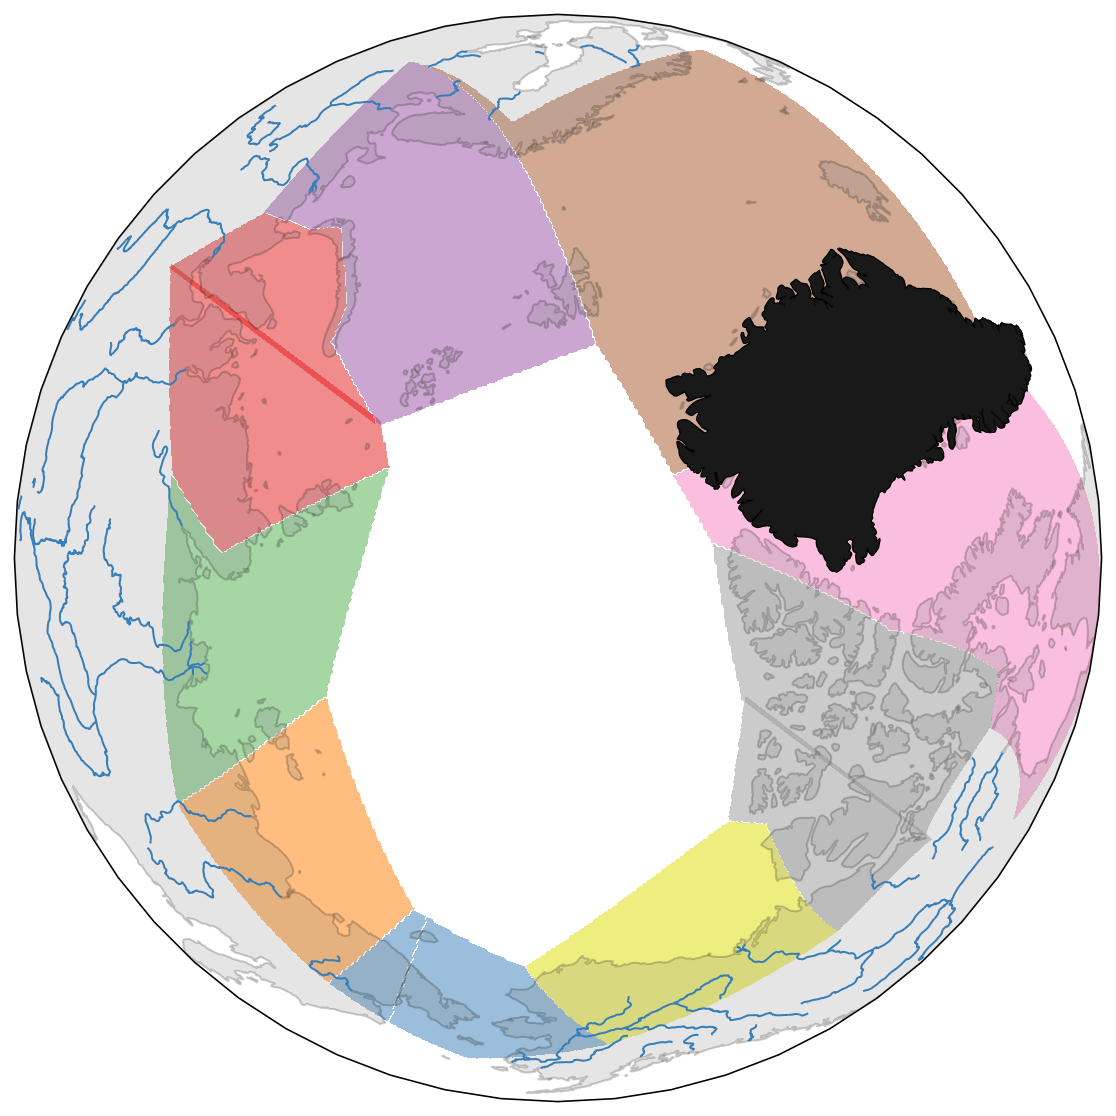

In [65]:
#========= CREATE FIGURE
diro = "/gpfsscratch/rech/cli/uor98hu/PLOTS/"
namo  ="Rivers_encartwithcolors.png"
print(namo)
#===========================================
fig = plt.figure(figsize=([18,10]),facecolor='none', dpi=72*2)

trdata  = ccrs.PlateCarree() # Data system proj (if coords are in lat lon, use PlateCarre here)
ax = plt.axes(projection= ccrs.NearsidePerspective(central_longitude=loncentr, central_latitude=latcentr,satellite_height=sath))

rivers = cartopy.feature.NaturalEarthFeature(category='physical', name='rivers_lake_centerlines',scale='50m',facecolor='none',edgecolor=CB_colors['blue'])
clr2 = ax.add_feature(rivers,alpha=1,facecolor='none',edgecolor=CB_colors['blue'],zorder=6)
cl2 = ax.add_feature(cfeature.LAND.with_scale('50m'),facecolor="gray",edgecolor= 'k',alpha=0.2,zorder=5)


# ax.contour(nav_lon,nav_lat,Chukchi_mask.where(nav_lon<0),1,colors=CB_colors['blue'], transform=trdata)
# ax.contour(nav_lon,nav_lat,Chukchi_mask.where(nav_lon>0),1,colors=CB_colors['blue'],transform=trdata)
ax.contourf(nav_lon,nav_lat,Chukchi_mask.where(nav_lon<0).where(Chukchi_mask==1),1,colors=CB_colors['blue'], transform=trdata, alpha=0.5)
ax.contourf(nav_lon,nav_lat,Chukchi_mask.where(nav_lon>0).where(Chukchi_mask==1),1,colors=CB_colors['blue'],transform=trdata, alpha=0.5)
ax.contourf(nav_lon,nav_lat,eastsiberian_mask.where(eastsiberian_mask==1),1,colors=CB_colors['orange'],transform=trdata, alpha=0.5)
ax.contourf(nav_lon,nav_lat,laptev_mask.where(laptev_mask==1),1,colors=CB_colors['green'],transform=trdata, alpha=0.5)
ax.contourf(nav_lon,nav_lat,kara_mask.where(kara_mask==1),1,colors=CB_colors['red'],transform=trdata, alpha=0.5)
ax.contourf(nav_lon,nav_lat,barents_mask.where(barents_mask==1),1,colors=CB_colors['purple'],transform=trdata, alpha=0.5)
ax.contourf(nav_lon,nav_lat,norwegian_mask.where(norwegian_mask==1),1,colors=CB_colors['brown'],transform=trdata, alpha=0.5)
ax.contourf(nav_lon,nav_lat,BaffinHudson_mask.where(BaffinHudson_mask==1),1,colors=CB_colors['pink'],transform=trdata, alpha=0.5)
ax.contourf(nav_lon,nav_lat,caa_mask.where(caa_mask==1),colors=CB_colors['gray'],transform=trdata, alpha=0.5)
ax.contourf(nav_lon,nav_lat,beaufort_mask.where(beaufort_mask==1),1,colors=CB_colors['yellow'],transform=trdata, alpha=0.5)

ax.fill(x_gr_coast,y_gr_coast,color='k',fill=True,transform=trdata)

# plt.fill(lon, lat, edgecolor='r', fill=False)
# cmap, norm, vmin, and vmax.
ax.set_global()
plt.show()
fig.savefig(diro+namo, facecolor=fig.get_facecolor(), bbox_inches='tight',edgecolor='none') 
plt.close(fig)